# Описание

На этот раз данные имеют следующую структуру:

* записываются для каждого пользователя, совершившего покупки, каждый день
* для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
* внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:
```
└── data
   ├── 2020-12-30   
   │  ├── FirstName_LastName1   
   │  │   └── data.csv  
   │  ├── FirstName_LastName2   
   │  │   └── data.csv  
   │  └── FirstName_LastName3   
   │      └── data.csv   
   └── 2020-12-31   
      ├── FirstName_LastName1      
      │   └── data.csv      
      └── FirstName_LastName5      
          └── data.csv
```      
Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

**Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.**

      

## Задачи
1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

**1. 💀 Сложное задание! 💀**

**Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).**

Пример итоговой таблицы:

product_id | quantity  |  name      |       date
-----------|-----------|------------|------------
0   |    56     |     2     |    Anatoly_Karpov |  2020-12-30
1   |    7     |      2    |     Anatoly_Karpov |  2020-12-30
2   |    9     |      3     |    Anatoly_Karpov  | 2020-12-30

Для объединения датафреймов, читаемых из файлов, можно использовать метод pd.concat(). Например:

1. Имеются следующие данные:

`df_1:`

product_id | quantity  |  name        |       date
---------|----------|-------------|---------------|
0   |    56     |     2    |     Anatoly_Karpov   |  2020-12-30
1    |   7      |     2      |   Anatoly_Karpov    | 2020-12-30
2   |    9     |      3     |    Anatoly_Karpov    | 2020-12-30

`df_2:`

product_id | quantity  |  name        |       date
----------|------------|-------------|-------------- 
0   |    4       |    2     |    Кatya_Skriptsova  | 2020-12-30
1    |   71     |     1     |    Кatya_Skriptsova  | 2020-12-31

2. Соединяем, передав pd.concat на вход список датафреймов, которые нужно объединить. Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.
```python
df = pd.concat([df_1, df_2])
```

`df:`

product_id | quantity  |  name     |           date
---------|-------------|----------|-------------------|
0    |   56      |    2      |   Anatoly_Karpov   |   2020-12-30
1    |   7       |    2      |   Anatoly_Karpov   |   2020-12-30
2    |   9     |      3    |     Anatoly_Karpov   |   2020-12-30
0   |    4     |      2    |     Кatya_Skriptsova   | 2020-12-30
1   |    71     |     1     |    Кatya_Skriptsova  |  2020-12-31

**В качестве ответа укажите сумму по колонке quantity.**

Также могут пригодиться:

* Просмотр содержимого папок
* Циклы
* Сбросить индексы
* Присоединить датафрейм


In [6]:
import pandas as pd
import os

In [112]:
dff=df.groupby('name').quantity.sum()
dff.loc[dff.values == dff.max()].index.sort_values()df_list=[]
#df=pd.DataFrame({'date': [], 'name': []})
for path, xxx, files in os.walk('data'):
    #print(path, dirs, files)
    if files != []:
        dfn = pd.read_csv(path + '\\' + files[0])
        path2 = path.split('\\')
        dfn['date'] = path2[1]#pd.Series(dfn.shape[0] * [path2[1]])
        dfn['name'] = path2[2]#pd.Series(dfn.shape[0] * [path2[2]])
        df_list.append(dfn)
df = pd.concat(df_list)    
df = df.iloc[:,[3, 4, 1, 2]].reset_index(drop=True)
df

,date,name,product_id,quantity
0,2020-12-03,Alexey_Smirnov,47,1
1,2020-12-03,Alexey_Smirnov,57,1
2,2020-12-03,Alexey_Smirnov,14,2
3,2020-12-03,Alexey_Smirnov,52,1
4,2020-12-03,Alexey_Smirnov,1,4
...,...,...,...,...
156,2020-12-09,Rostislav_Petrov,66,4
157,2020-12-09,Rostislav_Petrov,39,2
158,2020-12-09,Vasiliy_Ivanov,82,4
159,2020-12-09,Vasiliy_Ivanov,74,2


In [70]:
#способ быстрее(?)
import pandas as pd
import os

root_path = 'data/'
df_list = []

for date in os.listdir(root_path):
    for name in os.listdir(root_path + date):
        if name.startswith('.'):
            continue
        file_path = f'{root_path}{date}/{name}/data.csv'
        t_df = pd.read_csv(file_path, sep = ',', index_col = 0)
        t_df['name'], t_df['date'] = name, date
        df_list.append(t_df)
df = pd.concat(df_list).reset_index().drop(columns={'index'})
df#.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


**2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:**

Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [121]:
dff=df.groupby('name').quantity.sum()
dff.loc[dff.values == dff.max()].index.sort_values()

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

Ответ: `Alexey_Smirnov, Petr_Smirnov`

**3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:**

* по оси x – идентификаторы товаров (product_id) 
* по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

**Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order).** 

**В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

,product_id,quantity
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12
62,88,11


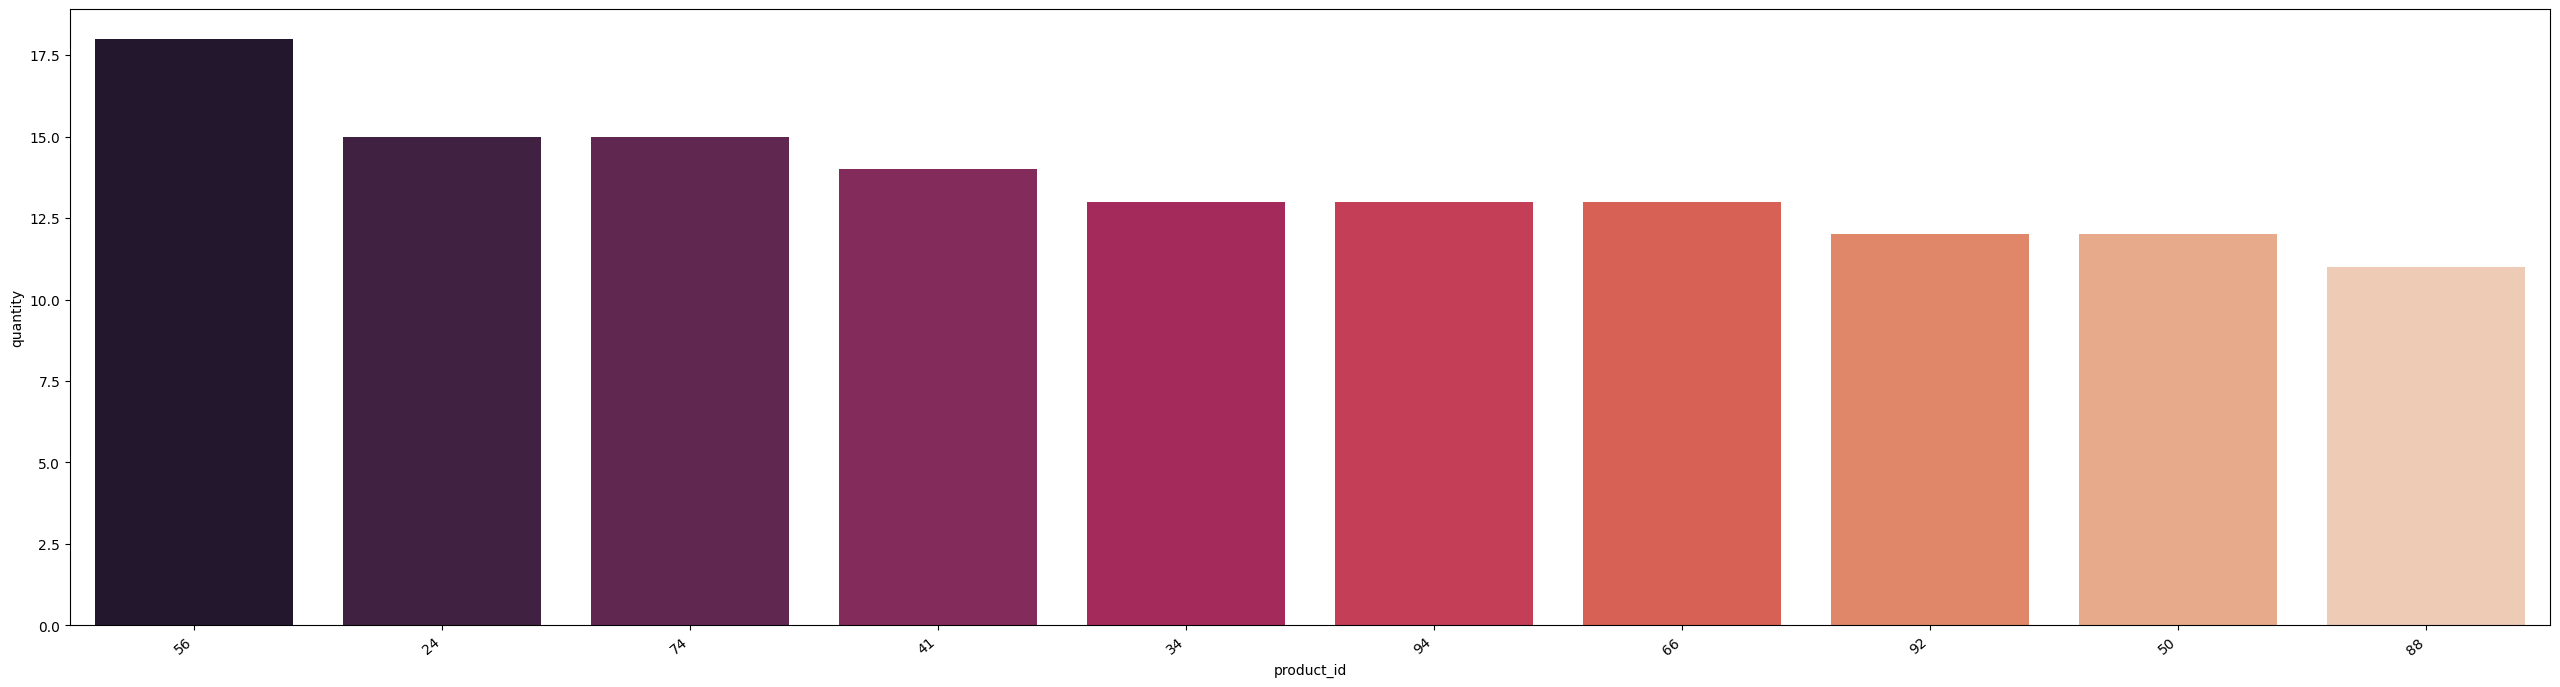

In [46]:
#dff2 = df.groupby('product_id').quantity.sum()[1:50].sort_values()[-11:-1]
dff2 = df.groupby('product_id', as_index=False).quantity.sum().sort_values('quantity', ascending=False)[1:11]

#dff2.reset_index().rename({})
#барплот отменил sort_values!! 
plt.figure(figsize=(17,5))
#ax=sns.barplot(x = dff2.index, y = dff2.values, palette='rocket', order=dff2.index)#.sort_values())
ax=sns.barplot(data=dff2, x = 'product_id', y = 'quantity', palette='rocket', order=dff2.product_id)

dff2

Ответ: `18`

**4. Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). Далее выберите верные утверждения:**

* **Максимальное число товаров было продано 4 декабря**
* 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день
* **8 и 9 декабря было продано примерно одинаковое число товаров**
* Меньше всего продуктов было приобретено 4 декабря
* **4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день**
* **Меньше всего товаров было приобретено 6 декабря**
* 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

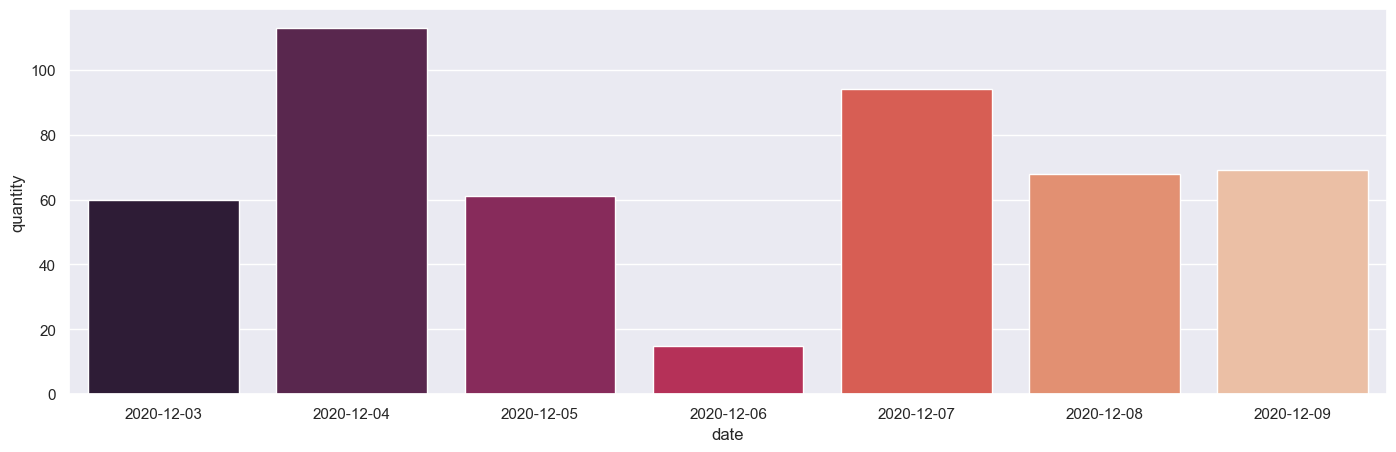

In [68]:
dff3 = df.groupby('date', as_index=False).quantity.sum()

ax = plt.subplots(figsize=(17,5))
ax=sns.barplot(data=dff3, x = 'date', y = 'quantity', palette='rocket')
#sns.set(rc = {'figure.figsize':(16,8)})
#ax=sns.barplot(data=dff3, x = 'date', y = 'quantity', palette='rocket', order=dff3.sort_values('quantity').date)

**5. 💀 Сложное задание! 💀**

**Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.**

**Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.**
    

product_id | quantity  | name      |        date
-----------|-----------|-----------|-----------
25    |    2     |   Katya Skriptsova | 2020-12-05
54      |   1      |  Olya Silyutina   | 2020-12-05
7      |    4    |    Katya Skriptsova | 2020-12-05
6      |    4     |   Sasha Tsarev   |   2020-12-06
6     |     1     |   Sasha Tsarev    |  2020-12-06
7       |   5      |  Katya Skriptsova | 2020-12-06 

Может пригодиться: **.drop_duplicates()**

In [145]:
df#.drop_duplicates(subset=['name', 'product_id', 'date'])
users_days_per_id=df.groupby(['name','product_id']).date.nunique()  #не count 
uu=users_days_per_id[users_days_per_id>1] 
[x[0] for x in uu.index.values] #какие пользователи

['Anton_Ivanov', 'Petr_Fedorov']

In [184]:
#вариант с duplicated
d1=df.loc[df.duplicated(subset=['name', 'product_id', 'date'], keep=False)]
d2=df.loc[df.duplicated(subset=['name', 'product_id'], keep=False)]
pd.concat([d2,d1]).drop_duplicates(keep=False)

,product_id,quantity,name,date
15,94,4,Petr_Fedorov,2020-12-03
96,15,4,Anton_Ivanov,2020-12-07
104,94,4,Petr_Fedorov,2020-12-07
147,15,3,Anton_Ivanov,2020-12-09


Ответ: `2`